# 1. What are the active reports?

In [1]:
import os
import pandas as pd
from datetime import datetime, date

In [2]:
os.listdir("data/Salesforce/Objects")

['DataLoad_Exception_Log__c_5k_sample.csv',
 'EventDefinition_1k_samples.csv',
 'FieldDefinition_all_sample.csv',
 'ExceptionLogger__c_5k_sample.csv',
 'EventLogFile_all_sample.csv',
 'Report_all_sample.csv',
 'ReportEvent_50k_Sample.csv']

## Loading reports

In [3]:
reports = pd.read_csv("data/Salesforce/Objects/Report_all_sample.csv")

In [4]:
reports.shape

(17397, 18)

In [5]:
list(reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp']

In [6]:
reports.head()

,CreatedById,CreatedDate,Description,DeveloperName,FolderName,Format,Id,IsDeleted,LastModifiedById,LastModifiedDate,LastReferencedDate,LastRunDate,LastViewedDate,Name,NamespacePrefix,OwnerId,ReportTypeApiName,SystemModstamp
0,0050b000004MLGeAAO,2018-06-20T19:28:03.000Z,NaN,Email2Case_KPI_Wp9,Public Reports,Summary,00O0b000004kSKkEAM,False,0050b000004MLGeAAO,2019-10-16T03:00:16.000Z,2022-06-20T02:04:59.000Z,2022-06-20T02:04:59.000Z,2022-06-20T02:04:59.000Z,Email2Case KPI,NaN,00D0b000000GaMpEAK,CaseList@Case.MaritzCX__Survey_Response_Id__c,2022-06-20T02:04:59.000Z
1,0050b000004KRSoAAO,2021-08-18T13:14:25.000Z,NaN,Milestone_Report_by_Pallavi_Reddy,Public Reports,Summary,00O2R000003JUgNUAW,False,0050b000004KRSoAAO,2021-08-19T07:27:05.000Z,2022-06-19T18:20:34.000Z,2022-04-18T05:30:14.000Z,2022-06-19T18:20:34.000Z,APJ RDC PM Team - Milestone Report,NaN,00D0b000000GaMpEAK,Project_with_Order_Milestone_Product__c,2022-04-18T05:30:14.000Z
2,0050b000004KRSoAAO,2021-08-18T14:53:32.000Z,NaN,APJ_RDC_PM_Current_Quarter_Milestones,Public Reports,Summary,00O2R000003JUh6UAG,False,0050b000004KRSoAAO,2021-08-19T07:08:48.000Z,NaN,2022-05-25T08:03:16.000Z,NaN,APJ RDC PM - Current Quarter Milestones,NaN,00D0b000000GaMpEAK,Project_with_Order_Milestone_Product__c,2022-05-25T08:03:16.000Z
3,0050b000004KVKcAAO,2021-05-06T17:43:54.000Z,Show QTD Earned Revenue - Milestones that have...,C_C_QTD_Earned_Revenue1,Public Reports,Summary,00O2R000003s1qaUAA,False,0050b000004KVKcAAO,2021-08-09T21:37:07.000Z,2022-06-19T18:20:37.000Z,2022-06-15T20:56:37.000Z,2022-06-19T18:20:37.000Z,C&C - QTD Earned Revenue,NaN,00D0b000000GaMpEAK,NaN,2022-06-15T20:56:37.000Z
4,0052R000009nJKyQAM,2020-08-06T07:00:50.000Z,NaN,Germany_Swivel_Projects_2,Public Reports,Tabular,00O2R000003rzEdUAI,False,0050b000004KUjyAAG,2020-09-01T13:03:59.000Z,NaN,2021-10-28T19:18:37.000Z,NaN,Germany Swivel Projects CFQ,NaN,00D0b000000GaMpEAK,NaN,2021-10-28T19:18:37.000Z


In [7]:
reports = reports.dropna(subset=['LastRunDate'])

In [8]:
reports.shape

(17235, 18)

## Sorting reports by LastRunDate

In [9]:
sortedByLastRunDate = reports.sort_values('LastRunDate', ascending=False)

Let's define a reference date and a time window to consider active reports.

- The reference date may be the most recent date in our sample.
- Let's consider a range of 180 in this analysis.

Since the reports are sorted by `LastRunDate`, our reference date is the first row of the dataframe.

In [10]:
sortedByLastRunDate['LastRunDate'].iloc[0]

'2022-06-20T02:07:25.000Z'

Remove training 'Z' without loss of useful information. (according to this [reference](https://social.msdn.microsoft.com/Forums/en-US/27c2f2a9-8a77-4a11-9f71-5e56ddbf064b/what-is-z-in-date-time-format-yyyymmddthhmmssz?forum=csharpgeneral))

In [11]:
sortedByLastRunDate['LastRunDate'].iloc[0][:-1]

'2022-06-20T02:07:25.000'

In [12]:
dateStr = sortedByLastRunDate['LastRunDate'].iloc[0][:-1]
referenceDate = datetime.fromisoformat(dateStr).date()

In [13]:
referenceDate

datetime.date(2022, 6, 20)

Let's filter all reports that were run at least 180 days from this date.

In [14]:
elapsed_days = 180

Writing a function to filter active reports.

In [15]:
def filterActiveReports(lastRunDate):
    dateStr = lastRunDate[:-1] # removing trailing 'Z'
    timedelta = referenceDate - datetime.fromisoformat(dateStr).date()
    return timedelta.days <= elapsed_days

Creating a column to distinguish active and inactive reports.

In [16]:
reports['isActive'] = reports['LastRunDate'].apply(filterActiveReports)

In [17]:
reports['isActive'].value_counts()

True     11605
False     5630
Name: isActive, dtype: int64

<AxesSubplot:>

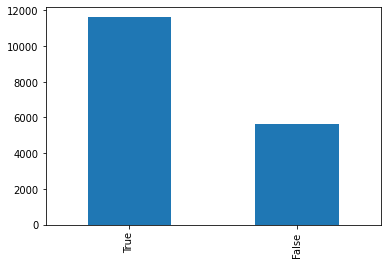

In [18]:
# a plot example
reports['isActive'].value_counts().plot(kind='bar')

In [19]:
activeReports = reports[reports['isActive']]

In [20]:
activeReports.shape

(11605, 19)

Storing a dataset with only active reports.

In [21]:
activeReports.to_csv("./datasets/active_reports_180.csv", index=False)